<a href="https://colab.research.google.com/github/maria-snarava/portfolio-ml/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

**Developed by Maryia Snarava**

This notebook demonstrates the process of predicting customer churn using machine learning techniques. **Customer churn** is when customers stop doing business with a company. Predicting churn can help businesses take proactive steps to retain customers. Throughout this notebook, we'll go through the entire machine learning pipeline, including data exploration, data preprocessing, feature engineering, model training, and evaluation.

 My approach is as follows:

1. I'll start with **Logistic Regression** as our baseline model. Logistic Regression is a simple yet powerful algorithm for binary classification problems like churn prediction. It's a great starting point as it's easy to implement and interpret.

2. Using **Logistic Regression**, I've achieved an accuracy of **81%** in predicting customer churn. And **Recall**: 0.85, **PR AUC**: 0.721, **F1 Score**: 0.60.

This serves as our baseline performance.

3. Then, using **Feature Engineering**, I've improved this model.

4. Then I did **Hyperparameter Tuning** using  grid search and have improved this model.

3. Then I experimented with more advanced algorithms with hyperparameter tuning to improve upon this baseline:
   - Decision Tree
   - XGBoost
   - Support Vector Machines

4. Then I compared all model metrics and chosed the best one.
By comparing all models to our Logistic Regression baseline, I'll be able to assess get the beter performance.

As results on best model on test set I get **Recall**: 0.95, **PR AUC**: 0.977, **F1 Score**: 0.954. Accurancy is 98.462%.

For this notebook I used a dataset from Kaggle. You can find the dataset [here](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).

## 1. Introduction


### What is Customer Churn?

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. In the context of this analysis:

- Churn occurs when a customer cancels their service or stops using a product.
- It's a critical metric for businesses, especially in subscription-based models.
- High churn rates can significantly impact a company's revenue and growth.

### Importance of Predicting Churn

Understanding and predicting churn is crucial for several reasons:

1. **Revenue Retention**:
   - Existing customers are often more profitable than new ones.
   - It's typically more cost-effective to retain customers than to acquire new ones.

2. **Customer Lifetime Value**:
   - Loyal customers tend to make more purchases over time.
   - They may also upgrade to higher-value products or services.

3. **Predictable Revenue**:
   - A stable customer base leads to more predictable revenue streams.
   - This can be particularly important for investor relations and financial planning.

4. **Upselling and Cross-selling Opportunities**:
   - Long-term customers are often more receptive to additional products or services.

5. **Targeted Interventions**:
   - Identifying potential churners allows for proactive measures to retain them.
   - Personalized retention strategies can be implemented before a customer leaves.

6. **Feedback and Improvement**:
   - Understanding why customers churn can highlight areas for product or service improvement.
   - It provides insights into customer preferences and pain points.

### Choosing the right metric for model

In the context of our model, correctly identifying customers likely to churn (**true positives**) is particularly important because it allows the business to take timely action. **False negatives** (failing to identify customers who will churn) represent missed opportunities to retain valuable customers and the associated revenue.

While it's also important not to misclassify loyal customers as potential churners (**false positives**), the cost of reaching out to a satisfied customer is generally lower than the cost of losing a customer who could have been retained with proper intervention.

This is why I will use metrics that emphasize the correct identification of churners instead of accuracy.

To create model, that correctly predicting the churned customers I am going to focusing on these metrics:

- **Recall**: This is crucial as it directly measures how well we're identifying churned customers.

- **PR AUC**: This gives a good overall picture of performance on imbalanced data.

- **F1 Score**: This balances precision and recall.

## 2. Data Loading and Exploration

Here, I'll get a better understanding of dataset. First, I load the customer dataset:

In [1]:
import numpy as np
import pandas as pd

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/ECommerceDataset.xlsx', sheet_name='E Comm')

In [5]:
RANDOM_STATE = 42

df = pd.read_excel('data/ECommerceDataset.xlsx', sheet_name='E Comm')

### Data Variable Description
| Column Name | Description |
|----|----|
| **CustomerID** | Unique customer ID |
| **Churn** | Churn Flag |
| **Tenure** | Tenure of customer in organization  |
| **PreferredLoginDevice** | Preferred login device of customer |
| **CityTier** | City tier |
| **WarehouseToHome**| Distance in between warehouse to home of customer |
| **PreferredPaymentMode** | Preferred payment method of customer |
| **Gender** | Gender of customer |
| **HourSpendOnApp** | Number of hours spend on mobile application or website |
| **NumberOfDeviceRegistered** | Total number of deceives is registered on particular customer |
| **PreferedOrderCat** | Preferred order category of customer in last month |
| **SatisfactionScore** | Satisfactory score of customer on service |
| **MaritalStatus** | Marital status of customer |
| **NumberOfAddress** | Total number of added added on particular customer |
| **Complain** | Any complaint has been raised in last month |
| **OrderAmountHikeFromlastYear** | Percentage increases in order from last year |
| **CouponUsed** | Total number of coupon has been used in last month |
| **OrderCount** | Total number of orders has been places in last month |
| **DaySinceLastOrder** | Day Since last order by customer |
| **CashbackAmount** | Average cashback in last month |

In [6]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


We can see that data range is big, so we need scale data.

Checking for duplicates in CustomerID column:

In [8]:
df['CustomerID'].duplicated().any()

False

There are no duplicates and we could drop CustomerID column, this value doesn't necessary for analysis

In [9]:
df = df.drop('CustomerID', axis=1)

## **3. Data Preprocessing**

### Handling Missing Values

First, we need to identify where missing values occur in our dataset - show percent of missing values:

In [10]:
#Identifying Missing Values
round((df.isnull().sum()*100 / df.shape[0]),2)

Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

All Missing values less than 6% so we will use Median **Imputation** from SimpleImputer.


  ### Checking imbalance  
  It is possible than there are small number of customers is crunched, so our data could be imbalalanced. Let's check it.

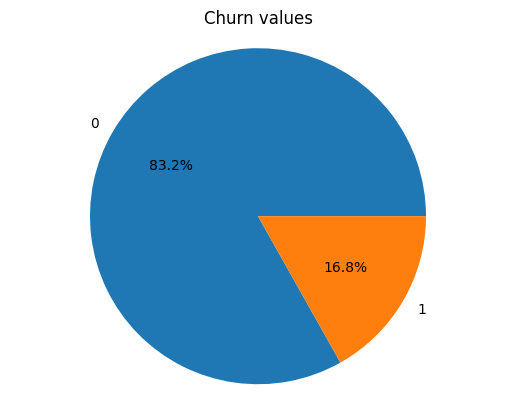

In [11]:
import matplotlib.pyplot as plt

def plot_pie_chart(df, column_name):
    column_counts = df['Churn'].value_counts()
    plt.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    plt.title(f'Churn values')
    plt.axis('equal')

    plt.show()

plot_pie_chart(df, 'Churn')

Our dataset is imbalanced with only 16.8% of churned customers, and correctly predicting the churned customers (**True positives**) is more important, because it will help businesses take proactive steps to retain customers.




I will use **StandardScaler** for **Scaling the data** and Median **Imputation** from SimpleImputer:

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline


def prepare_data(df):
    df_X = df.drop(columns=["Churn"])
    num_columns = df_X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    return num_columns, pipline_num

num_columns, pipline_num = prepare_data(df)

Transform categorical data to numerical using **OneHotEncoder**.






In [13]:
cat_columns = df.select_dtypes("object").columns
pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

transformer = ColumnTransformer(
    transformers=[('categorical_col', pipline_cat, cat_columns),
                  ('numerical_col', pipline_num, num_columns)]
    )

Data imbalanced so let's implement cost-sensitive learning during creating model.

## **4. Logistic Regression Model Building**
I am going to use **15% for validation** to evaluate the model's performance and tune hyperparameters during training. It helps me find the best model configuration before final evaluation. And I use **15% as test set** - completely separate portion of data used for the final and unbiased evaluation of your model's performance. The model has never seen this data during training or hyperparameter tuning.

Spliting data **using train_test_split** from **sklearn.model_selection**:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# prepare X and y
Y = df["Churn"]
X = df.drop(columns=["Churn"])
TEST_SIZE = 0.15
VAL_SIZE = 0.15

# prpeare training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE, stratify=y_train)

### Implementing logistic regression

Data imbalanced so let's implement cost-sensitive learning, using **compute_class_weight** function from scikit-learn:

In [15]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}
lg_model = LogisticRegression(max_iter=10_000, random_state=RANDOM_STATE, class_weight=class_weight)
undersampler = TomekLinks(sampling_strategy='majority')

pipeline = Pipeline([
          ('transformer', transformer),
          ('undersampler', undersampler),
          ('classifier', lg_model)
      ])

### Model training

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]...
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])),
                ('undersampler', TomekLinks(sampling_strategy='majority')),
                ('classifier',
                 LogisticRegression(class_weight={0: 0.6012714370195151,
                                                  1: 2.9686131386861314},
                                    max_iter=10000, random_state=42))])

## **5. Logistic Regression Model Evaluation**




Accuracy on Validation Set: 81.058%
Accuracy on Train Set: 81.092%
              precision    recall  f1-score   support

           0       0.96      0.80      0.88       597
           1       0.47      0.85      0.60       121

    accuracy                           0.81       718
   macro avg       0.71      0.83      0.74       718
weighted avg       0.88      0.81      0.83       718

______________________________________________
PR AUC: 0.7208
ROC AUC: 0.9015


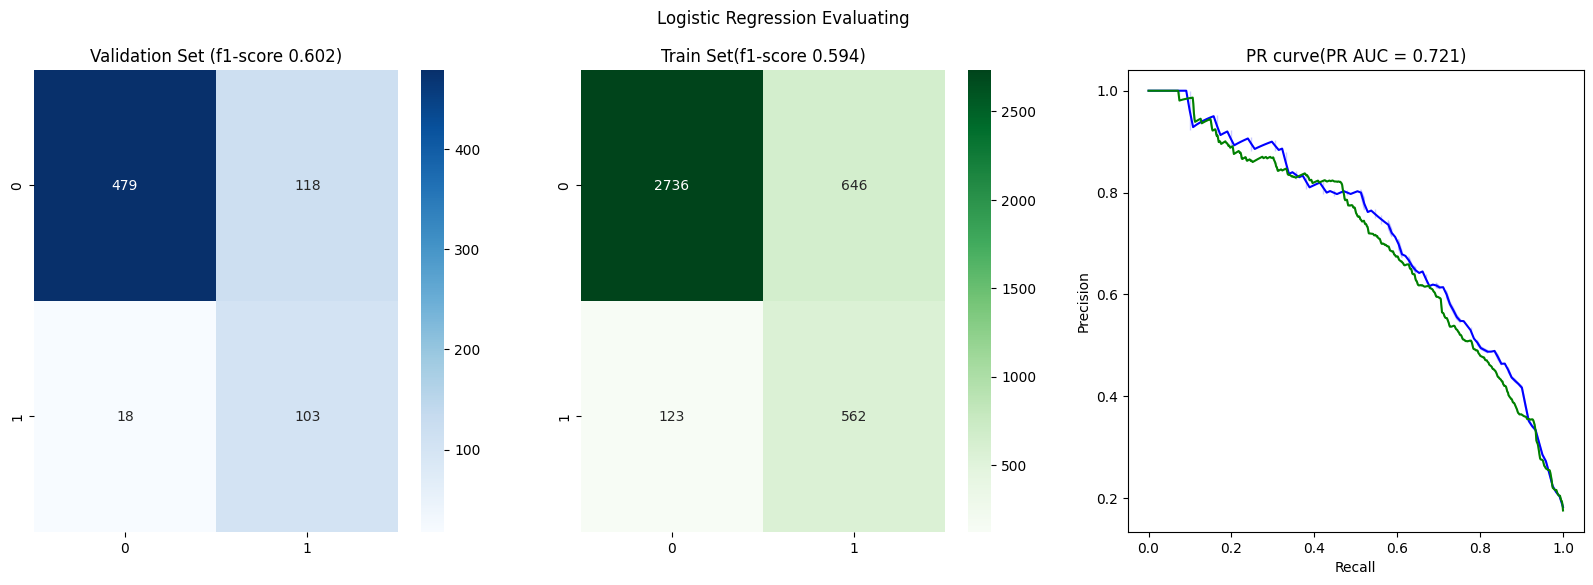

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, f1_score, recall_score, roc_auc_score, average_precision_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import seaborn.objects as so
from IPython.display import Image

collect_results = []

def model_evaluation(pipeline, X_test, y_test, X_train, y_train, model, probability=True, test=False):
    if test:
        name = 'Test Set'
    else:
        name = 'Validation Set'
    # calculate accuracy
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy on {name}: {accuracy * 100:0.5}%")
    print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred)* 100:0.5}%")
    report = classification_report(y_test, y_test_pred,output_dict=True)
    print(classification_report(y_test, y_test_pred))
    f1_test = report['1']['f1-score']
    recall_test_val = report['1']['recall']

    print('______________________________________________')
    #confusion matrixes
    fig, ax =plt.subplots(1, 3, figsize=(20, 6))

    cm_lr_test = confusion_matrix(y_test, y_test_pred)
    ax[0].set_title(f'{name} (f1-score {f1_test:.3f})')
    sns.heatmap(cm_lr_test, annot = True,fmt = 'd', cmap ='Blues', ax=ax[0])

    f1_train = f1_score(y_train, y_train_pred)
    cm_lr = confusion_matrix(y_train, y_train_pred)
    ax[1].set_title(f'Train Set(f1-score {f1_train:.3f})')
    sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Greens', ax=ax[1])
    if probability:
        y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
        y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_train_pred_proba = pipeline.predict(X_train)
        y_test_pred_proba = pipeline.predict(X_test)

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba)

    # Calculate the PR AUC
    pr_auc = average_precision_score(y_test, y_test_pred_proba)
    print(f"PR AUC: {pr_auc:.4f}")

    # ROC AUC (for comparison)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC AUC: {roc_auc:.4f}")

    # Precision-Recall curve
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
    ax[2].set_title(f'PR curve(PR AUC = {pr_auc:.3f})')
    sns.lineplot(x=recall_test, y=precision_test, color = 'blue',  ax=ax[2])
    sns.lineplot(x=recall_train, y=precision_train, color = 'green',  ax=ax[2])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    fig.suptitle(f'{model} Evaluating')
    plt.savefig(f'{model}.png')
    plt.show()

    return {
    'Accuracy Score': accuracy,
    'F1-score': f1_test,
    'Recall': recall_test_val,
    'PR AUC': pr_auc,
    'Model': model
    }

model = 'Logistic Regression'
collect_results.append(model_evaluation(pipeline, X_val, y_val,  X_train, y_train, model='Logistic Regression'))

So we have on validation set:
- **Recall**: 0.85

- **PR AUC**: 0.721

- **F1 Score**: 0.60

This serves as our baseline performance.


## Feature Engineering - Adding new variables

Let's create new features to increese accurancy of logistic regression:

- **Cashback per order** - let's caclulate the average amount of cashback for order
- **Average hour spend on app per order** - how many hours user spend on every order?
- **Satisfaction score after complain** - let's use satisfaction score for users who complain
- **Cashback amount per month** - average size of cashback every month
- And let's add polynomial features with the most correlated features

In [18]:
def add_features_to_set(df):
    df_new_features = df.copy()
    df_new_features['cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']
    df_new_features['avg_hour_spend_on_app_per_order'] = df['HourSpendOnApp'] / df['OrderCount']
    df_new_features['satisfaction_score_after_complain'] = df['Complain'] * df['SatisfactionScore']
    df_new_features['cashback_amount_per_month'] = df['CashbackAmount']/ (df['Tenure'] + 1)
    df_new_features['satisfaction_score_2'] = df['SatisfactionScore'] * df['Complain']
    df_new_features['tenure_2'] =  df['Tenure'] * df['Tenure']
    df_new_features['tenure_3'] =  df['Tenure'] * df['Tenure'] * df['Tenure']
    df_new_features['DaySinceLastOrder_2'] = df['DaySinceLastOrder'] * df['DaySinceLastOrder']
    df_new_features['cashback_amount_per_month_2'] = df_new_features['cashback_amount_per_month'] * df_new_features['cashback_amount_per_month']

    return df_new_features

X_train_2 = add_features_to_set(X_train)
X_val_2 = add_features_to_set(X_val)
X_test_2 = add_features_to_set(X_test)

In [19]:
len(X_train_2.columns)

27

## **6. Logistic Regression with Feature Engineering Model Building and Evaluation**

Accuracy on Validation Set: 84.819%
Accuracy on Train Set: 83.108%
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       597
           1       0.53      0.82      0.64       121

    accuracy                           0.85       718
   macro avg       0.75      0.84      0.77       718
weighted avg       0.89      0.85      0.86       718

______________________________________________
PR AUC: 0.7569
ROC AUC: 0.9186


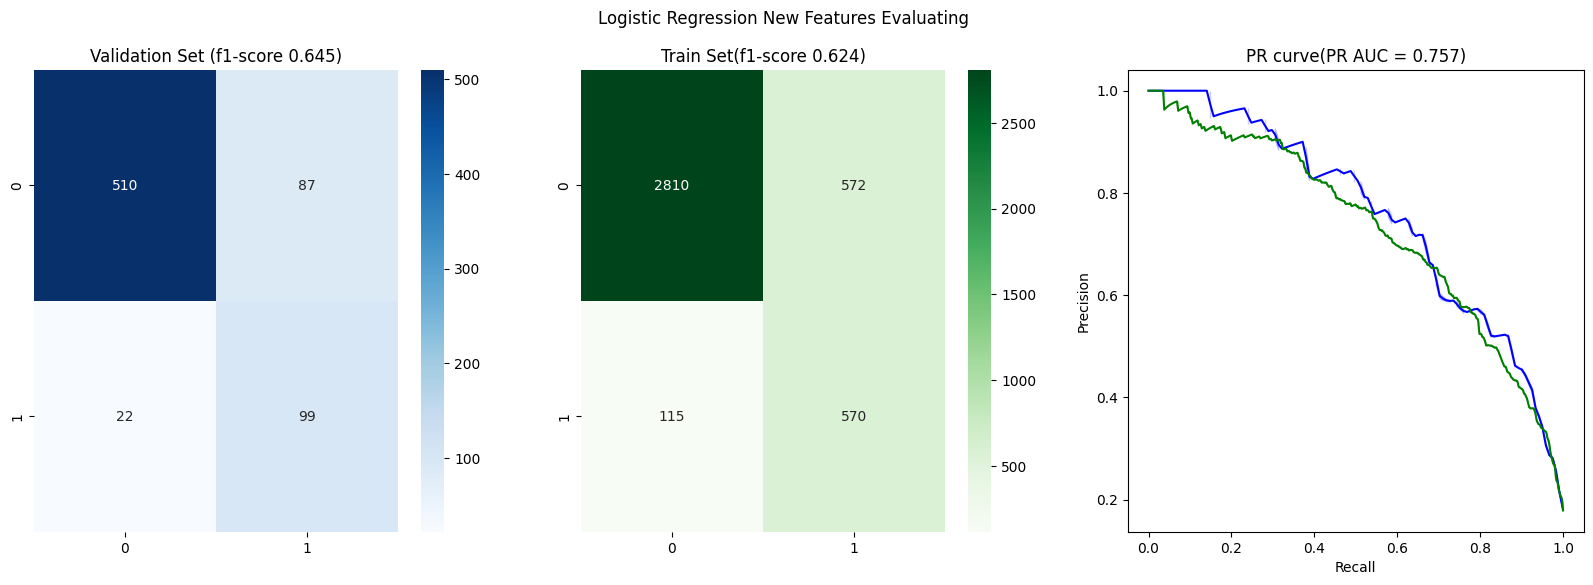

In [20]:
def prepare_pipeline(X, model):
    num_columns = X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    cat_columns = X.select_dtypes("object").columns
    pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

    transformer = ColumnTransformer(
        transformers=[('categorical_col', pipline_cat, cat_columns),
                      ('numerical_col', pipline_num, num_columns)]
        )

    pipeline = Pipeline([
              ('transformer', transformer),
              ('undersampler', undersampler),
              ('classifier', model)
          ])

    return pipeline

pipeline_2 = prepare_pipeline(X_train_2, lg_model)
pipeline_2.fit(X_train_2, y_train)

model = 'Logistic Regression New Features'
collect_results.append(model_evaluation(pipeline_2, X_val_2, y_val,  X_train_2, y_train, model=model))

Using feature engineering I achived on cross-validation set:

- **Recall**: 0.82

- **PR AUC**: 0.757

- **F1 Score**: 0.645

# **7. Hyperparameter Tuning**
Let's find better huperparams using **GridSearchCV**. I will try different solvers and the C parameters, that controls the penality strength.Our data is imbalansed, so I am going to compare model's **roc_auc** parameter.

In [21]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
import numpy as np

solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = np.logspace(-3,3,7)

# define grid search
grid = dict(
    classifier__solver=solvers,
    classifier__C=c_values,
    classifier__class_weight=[class_weight],
    classifier__max_iter=[10_000],
    classifier__random_state=[RANDOM_STATE]
    )
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)
grid_search = RandomizedSearchCV(estimator=pipeline_2, param_distributions=grid, cv=cv, scoring='f1')

grid_result = grid_search.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.614572 using {'classifier__solver': 'lbfgs', 'classifier__random_state': 42, 'classifier__max_iter': 10000, 'classifier__class_weight': {0: 0.6012714370195151, 1: 2.9686131386861314}, 'classifier__C': 10.0}


So, let's create model using the best params:

Accuracy on Validation Set: 84.819%
Accuracy on Train Set: 82.96%
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       597
           1       0.53      0.83      0.65       121

    accuracy                           0.85       718
   macro avg       0.75      0.84      0.78       718
weighted avg       0.89      0.85      0.86       718

______________________________________________
PR AUC: 0.7469
ROC AUC: 0.9160


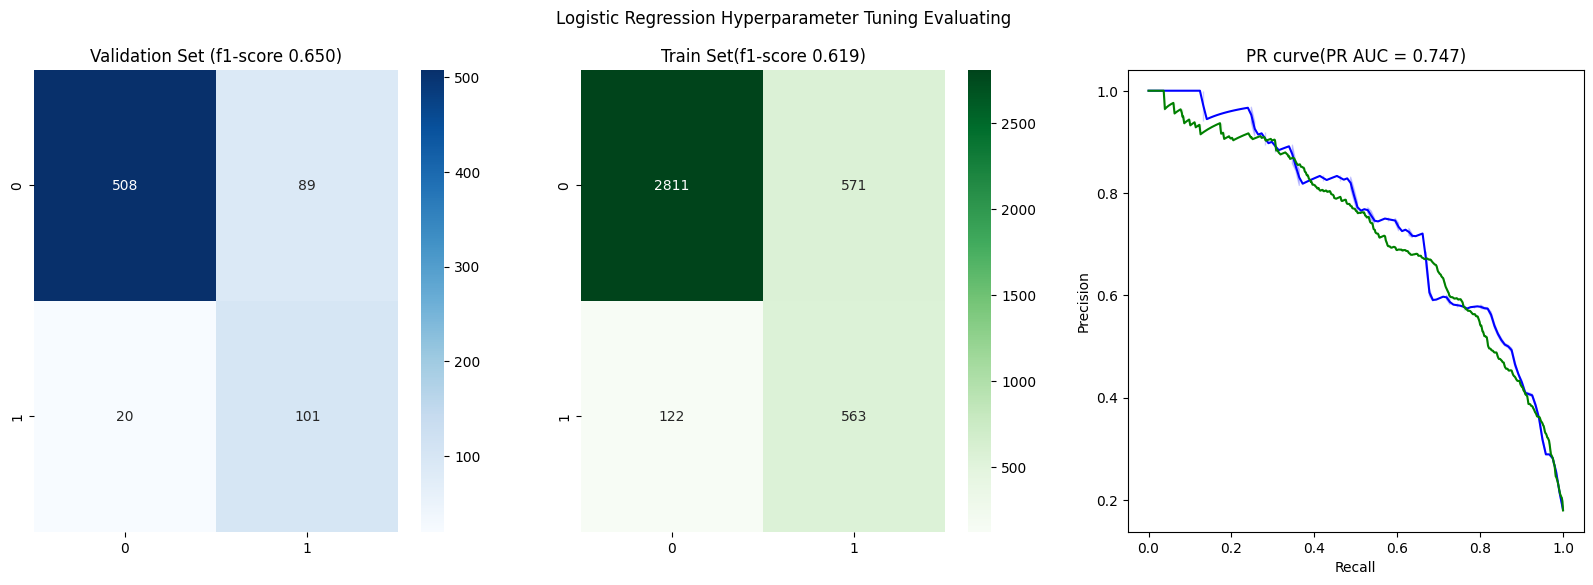

In [22]:
lg_model_2 = LogisticRegression(
    max_iter=10_000, random_state=RANDOM_STATE,
    C=grid_result.best_params_["classifier__C"],
    solver=grid_result.best_params_["classifier__solver"],
    class_weight=class_weight
    )

pipeline_3 = prepare_pipeline(X_train_2, lg_model_2)

pipeline_3.fit(X_train_2,y_train)

model = 'Logistic Regression Hyperparameter Tuning'
collect_results.append(model_evaluation(pipeline_3, X_val_2, y_val,  X_train_2, y_train, model=model))

Using Hyperparameter Tuning I achived on cross-validation set:

- **Recall**: 0.83

- **PR AUC**: 0.747

- **F1 Score**: 0.65

### Interpretation

An accuracy of 85.2% indicates that our model correctly predicts whether a customer will churn or not in 85.2% of cases. While this is a solid performance, there's still room for improvement. It's important to note that accuracy alone may not be sufficient to fully evaluate the model, especially if the dataset is imbalanced. Wwe can see, that f1-score is only 0.65. It meens, that we can trutly predict only 51% of customer who are going to churn.

### Limitations

1. Logistic regression assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true in complex real-world scenarios.
2. It may not capture complex, non-linear relationships in the data.
3. The model's performance might be affected if there are strong correlations between independent variables.

I think that is all that we can get from logistic regression, so let's try advanced algorithms, that could potentially yield better results for this classification task.

# **6. Decision Tree Classifier with Hyperparameters Tuning**

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight=class_weight
    )

pipeline_4 = prepare_pipeline(X_train_2, decision_tree_model)

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 6, 8, 16, 32, 64, None] # None means that there is no depth limit.

# define grid search
grid_dt = dict(
    classifier__min_samples_split=min_samples_split_list,
    classifier__max_depth=max_depth_list,
    classifier__class_weight=[class_weight],
    classifier__random_state=[RANDOM_STATE]
    )

grid_search_dt = RandomizedSearchCV(estimator=pipeline_4, param_distributions=grid_dt, cv=cv, scoring='f1')
grid_result_dt = grid_search_dt.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

Best: 0.788486 using {'classifier__random_state': 42, 'classifier__min_samples_split': 2, 'classifier__max_depth': 64, 'classifier__class_weight': {0: 0.6012714370195151, 1: 2.9686131386861314}}


Accuracy on Validation Set: 95.961%
Accuracy on Train Set: 99.902%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       597
           1       0.88      0.88      0.88       121

    accuracy                           0.96       718
   macro avg       0.93      0.93      0.93       718
weighted avg       0.96      0.96      0.96       718

______________________________________________
PR AUC: 0.7951
ROC AUC: 0.9296


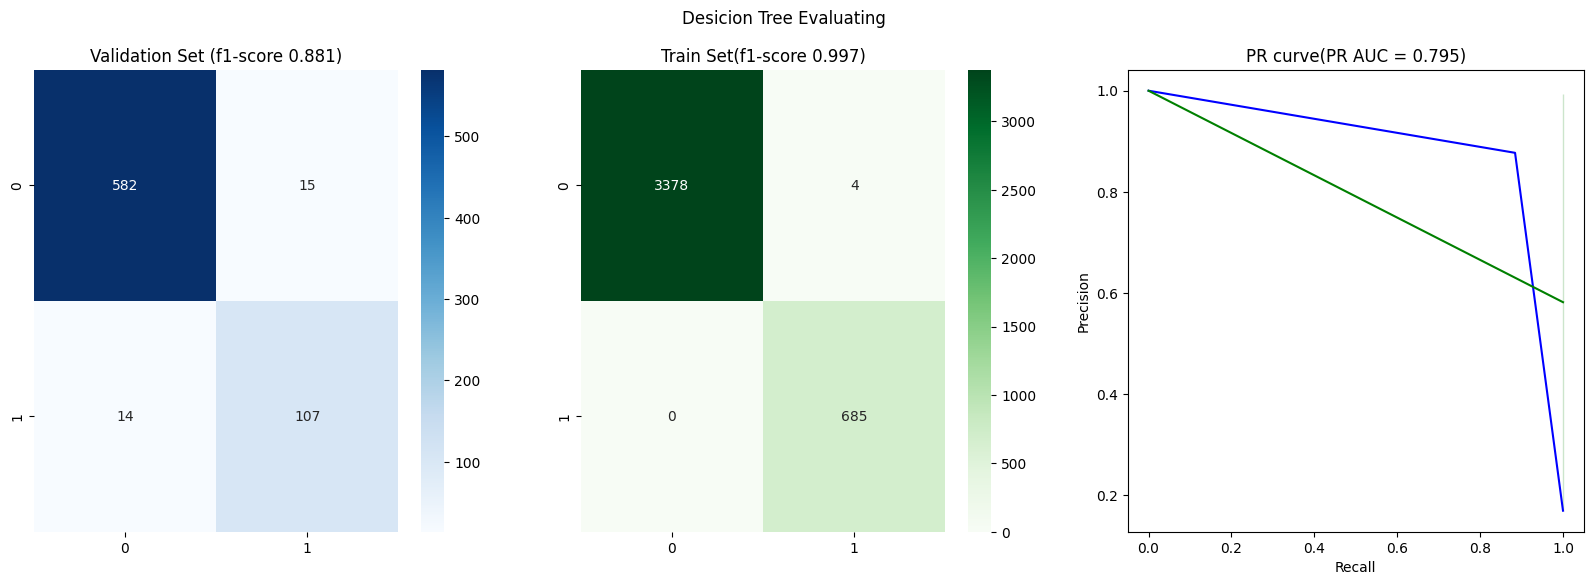

In [24]:
decision_tree_model_2 = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight=class_weight,
    max_depth = grid_result_dt.best_params_["classifier__max_depth"],
    min_samples_split = grid_result_dt.best_params_["classifier__min_samples_split"]
    )

pipeline_5 = prepare_pipeline(X_train_2, decision_tree_model_2)

pipeline_5.fit(X_train_2,y_train)

model = 'Desicion Tree'
collect_results.append(model_evaluation(pipeline_5, X_val_2, y_val,  X_train_2, y_train, model=model))

For decision tree we have:

- **Recall**: 0.90

- **PR AUC**: 0.772

- **F1 Score**: 0.665

Let's try more compex algorithm, based on desion trees to impove results.

## 7. **XGBoost with Hyperparameters Tuning**

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=RANDOM_STATE
    )

pipeline_5 = prepare_pipeline(X_train_2, xgb)

grid_xgb = dict(
    classifier__n_estimators=np.arange(10,100,10),
    classifier__learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5,1,5]
    )

grid_search_xgb = RandomizedSearchCV(estimator=pipeline_5, param_distributions=grid_xgb, cv=cv, scoring='f1')
grid_result_xgb = grid_search_xgb.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))

Best: 0.851524 using {'classifier__n_estimators': 70, 'classifier__learning_rate': 0.5}


Accuracy on Validation Set: 97.075%
Accuracy on Train Set: 99.951%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       597
           1       0.94      0.88      0.91       121

    accuracy                           0.97       718
   macro avg       0.96      0.94      0.95       718
weighted avg       0.97      0.97      0.97       718

______________________________________________
PR AUC: 0.9575
ROC AUC: 0.9826


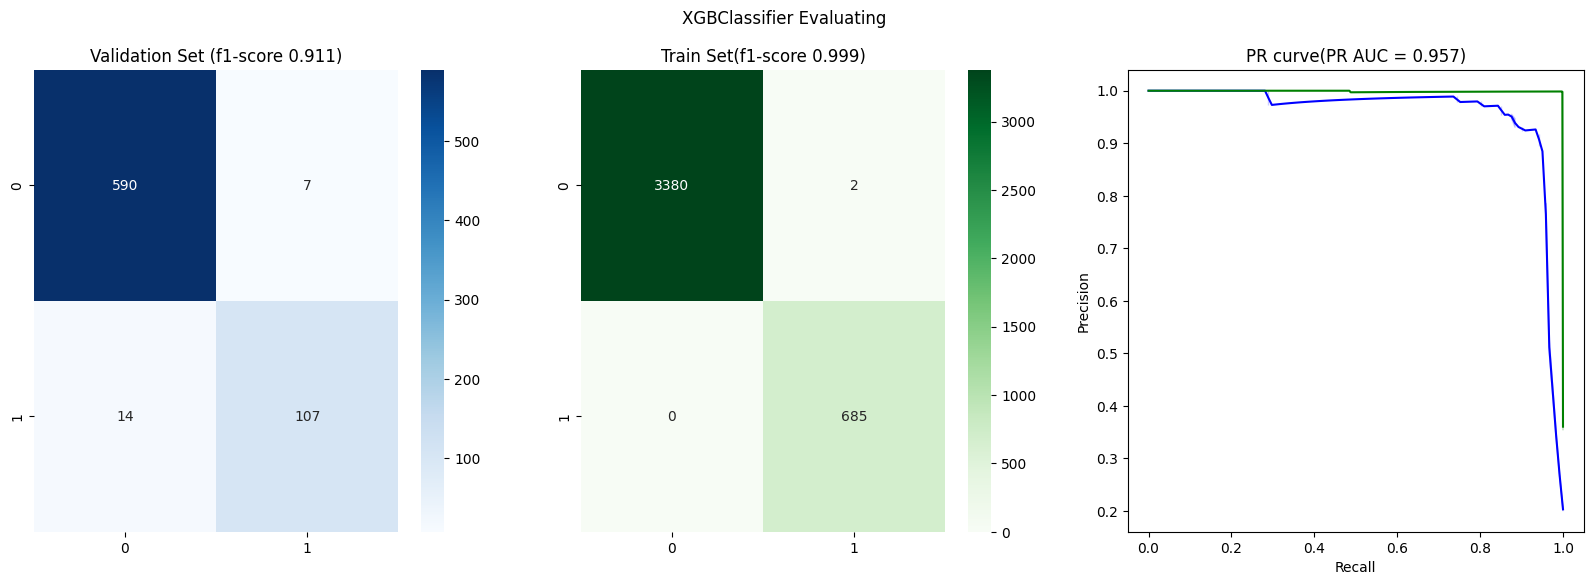

In [26]:
xgb_2 = XGBClassifier(
    random_state=RANDOM_STATE,
    learning_rate = grid_result_xgb.best_params_["classifier__learning_rate"],
    n_estimators = grid_result_xgb.best_params_["classifier__n_estimators"]
    )

pipeline_6 = prepare_pipeline(X_train_2, xgb_2)

pipeline_6.fit(X_train_2,y_train)
model = 'XGBClassifier'

collect_results.append(model_evaluation(pipeline_6, X_val_2, y_val,  X_train_2, y_train, model=model))

For XGBClassifier we have:

- **Recall**: 0.88

- **PR AUC**: 0.957

- **F1 Score**: 0.911

Is is good result, let's see if we could improve it using other algithms.

# **8. Support Vector Machines with Hyperparameters Tuning**

In [27]:
from sklearn.svm import SVC

grid_svc = {
    "classifier__C":np.arange(1,7,1),
    'classifier__gamma':[0.01,0.05,0.1,0.5,1,5]
    }
svm = SVC(random_state=RANDOM_STATE)
pipeline_7 = prepare_pipeline(X_train_2, svm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
grid_search_svm = RandomizedSearchCV(estimator=pipeline_7, param_distributions=grid_svc, cv=cv, scoring='f1')
grid_result_svm = grid_search_svm.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))

Best: 0.875825 using {'classifier__gamma': 0.1, 'classifier__C': 6}


Accuracy on Validation Set: 95.961%
Accuracy on Train Set: 99.828%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       597
           1       0.90      0.85      0.88       121

    accuracy                           0.96       718
   macro avg       0.94      0.92      0.93       718
weighted avg       0.96      0.96      0.96       718

______________________________________________
PR AUC: 0.7942
ROC AUC: 0.9164


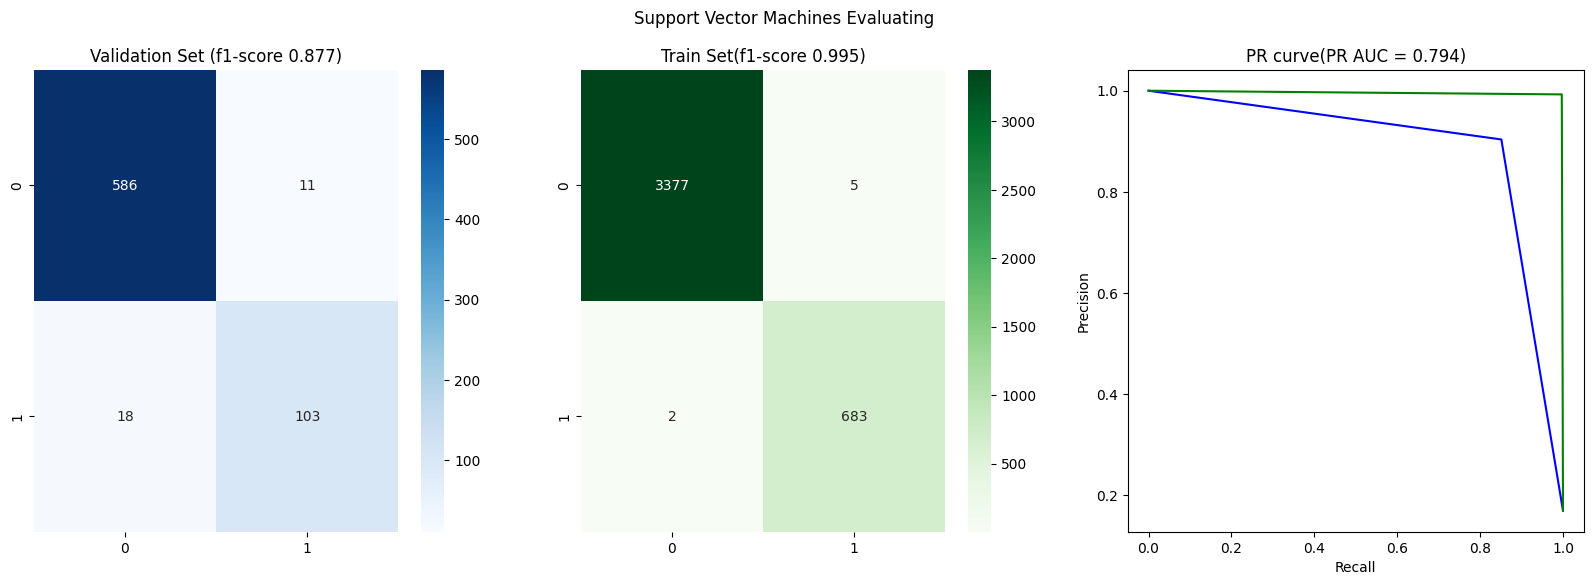

In [28]:
svm_2 = SVC(
    random_state=RANDOM_STATE,
    C = grid_result_svm.best_params_["classifier__C"],
    gamma = grid_result_svm.best_params_["classifier__gamma"]
    )

pipeline_8 = prepare_pipeline(X_train_2, svm_2)

pipeline_8.fit(X_train_2,y_train)

model = 'Support Vector Machines'
collect_results.append(model_evaluation(pipeline_8, X_val_2, y_val,  X_train_2, y_train, model=model, probability=False))

For upport Vector Machines we have:

- **Recall**: 0.85

- **PR AUC**: 0.794

- **F1 Score**: 0.877

Is is good result, but XGBClassifier got better results.

# **9. Comparison of models**

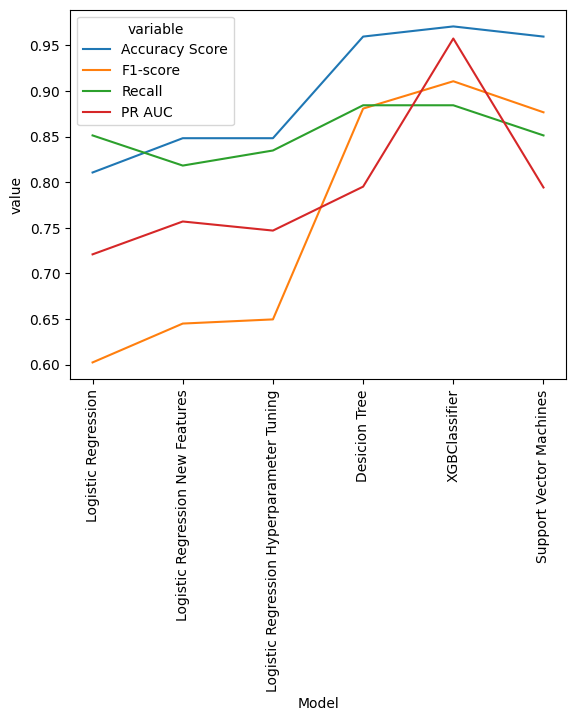

In [33]:
results = pd.DataFrame(collect_results)
results['Accuracy Score'] = pd.to_numeric(results['Accuracy Score'])
results['F1-score'] = pd.to_numeric(results['F1-score'])
results['Recall'] = pd.to_numeric(results['Recall'])
results['PR AUC'] = pd.to_numeric(results['PR AUC'])

collect_results_melted = pd.melt(results, id_vars=['Model'], value_vars=['Accuracy Score', 'F1-score', 'Recall', 'PR AUC'])
sns.lineplot(x='Model', y='value', hue='variable', data=collect_results_melted)
plt.xticks(rotation=90)
plt.show()

In [30]:
results

,Accuracy Score,F1-score,Recall,PR AUC,Model,PR_AUC
0,0.810585,0.602339,0.851240,0.720836,Logistic Regression,0.720836
1,0.848189,0.644951,0.818182,0.756869,Logistic Regression New Features,0.756869
2,0.848189,0.649518,0.834711,0.746900,Logistic Regression Hyperparameter Tuning,0.746900
3,0.959610,0.880658,0.884298,0.795071,Desicion Tree,0.795071
4,0.970752,0.910638,0.884298,0.957483,XGBClassifier,0.957483
5,0.959610,0.876596,0.851240,0.794172,Support Vector Machines,0.794172


# **9. Best model evaluation on test set**

As we could see on the plot we got the best results on all metrics with XGBClassifier. Let's choose it as a best model and evaluate it on test set:

Accuracy on Test Set: 98.462%
Accuracy on Train Set: 99.951%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.96      0.95      0.95       142

    accuracy                           0.98       845
   macro avg       0.97      0.97      0.97       845
weighted avg       0.98      0.98      0.98       845

______________________________________________
PR AUC: 0.9766
ROC AUC: 0.9956


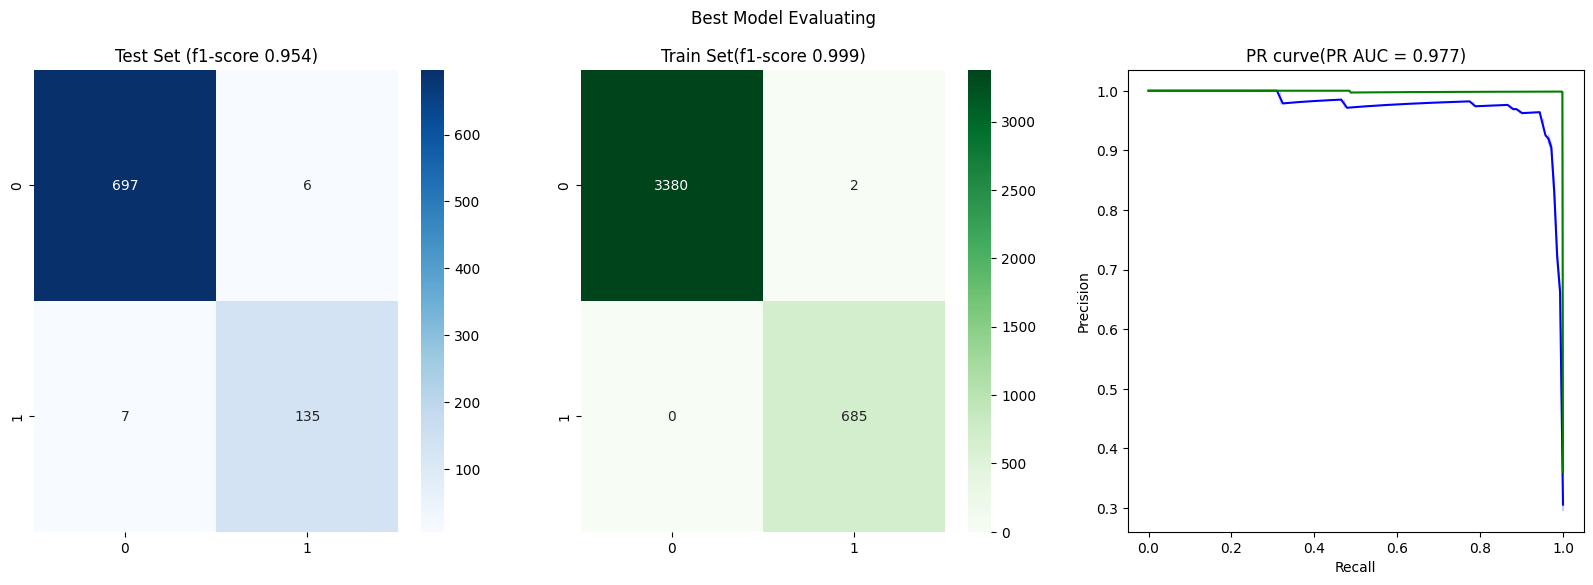

In [31]:
results = model_evaluation(pipeline_6, X_test_2, y_test,  X_train_2, y_train, model='Best Model', test=True)

As results we have on test set:

- **Recall**: 0.95

- **PR AUC**: 0.977

- **F1 Score**: 0.954



# **10.Summary of Results**
In this project, I built a customer churn prediction model using several machine learning models. The best model was **XGBClassifier** with **accuracy 95.737%** and **precision for True value 0.91** on the test set.

## Next Steps
To improve the model and gain deeper insights, I could suggest the following steps:

- **Feature Importance Analysis**: Conduct a deeper analysis of feature importances to understand key drivers of churn.
- **Deploy the model**: Create a REST API using Flask or FastAPI and deploy it to cloud providers.
- **Explainability**: Consider using techniques like SHAP (SHapley Additive exPlanations) to understand how the model makes predictions and build trust in its outputs.

In [32]:
%%writefile requirements.txt
pandas==1.5.3
numpy==1.23.5
scikit-learn==1.2.2
imblearn==0.10.1
seaborn==0.12.2
matplotlib==3.7.1
xgboost==1.7.5

Overwriting requirements.txt
